In [1]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Data Processing and Visualization

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True,as_frame=True)
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
diabetes_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [4]:
# Assign variables
X = diabetes_X['s3']
y = diabetes_y

Text(0, 0.5, 'Disease Progression')

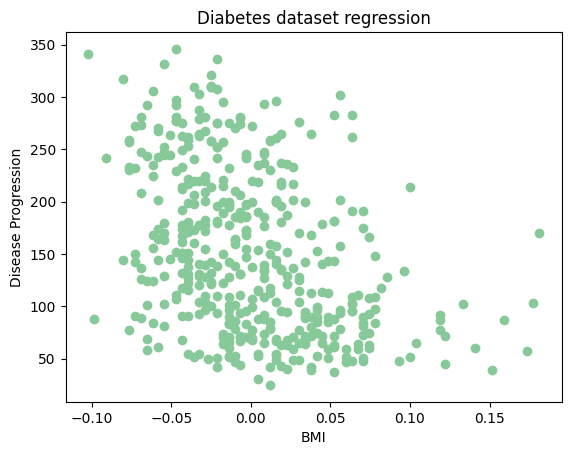

In [5]:
#Plot the dataset to visualize how to solve the problem
plt.scatter(X,y,color = '#88c999') #Scatter plot
plt.title('Diabetes dataset regression') #Set title
plt.xlabel('BMI') #Set x axis label
plt.ylabel('Disease Progression') #Set y axis label

# OLS (Ordinary Least Squares) Solution

In [6]:
X_mean = X.mean() # Mean of X
y_mean = y.mean() # Mean of Y
Sxx = np.sum((X - X_mean)**2) #Sum of Squares of X
Sxy = np.sum((X - X_mean)*(y-y_mean)) # Sum of Squares of Products of X and Y
Syy = np.sum((y-y_mean)**2) #Sum of Squares of Y

# The solution in the OLS case is: $$\hat{\alpha} = \frac{S_{xy}}{S_{xx}}$$  $$\hat{\beta} = \bar{y} - \hat{\alpha}\bar{x}$$


In [7]:
alpha = Sxy/Sxx #alpha calculation
alpha

-639.145279322535

In [8]:
beta = y_mean - alpha*X_mean #beta calculation
beta

152.13348416289594

In [9]:
#Function for prediction
def predict(alpha,beta,X):
    return alpha*X + beta

#Utility function for printing predictions
def print_predictions(prog,prog_pred):
    df_pred = pd.DataFrame({'Progression_measured':prog,'Progression_predicted':prog_pred,'Error':prog-prog_pred})
    return df_pred

#Utility function for plotting
def plot_predictions(prog,prog_pred):
    plt.scatter(prog,prog_pred)
    plt.title('Progression predicted vs measured') #Set title
    plt.ylabel('Progression predicted') #Set y axis label
    plt.xlabel('Progression measured') #Set x axis label
    plt.plot((0, np.max(prog)), (0,np.max(prog)), c = 'red',label='Perfect fit line') #Plot perfect fit line
    plt.legend() #Legends

In [10]:
y_pred_ols = [predict(alpha,beta,X_i) for X_i in X] #Predicted progression based on alpha and beta
df_ols = print_predictions(y,y_pred_ols)
df_ols.head()

,Progression_measured,Progression_predicted,Error
0,151.0,179.872930,-28.872930
1,75.0,104.573684,-29.573684
2,141.0,172.813626,-31.813626
3,206.0,175.166727,30.833273
4,135.0,146.929510,-11.929510


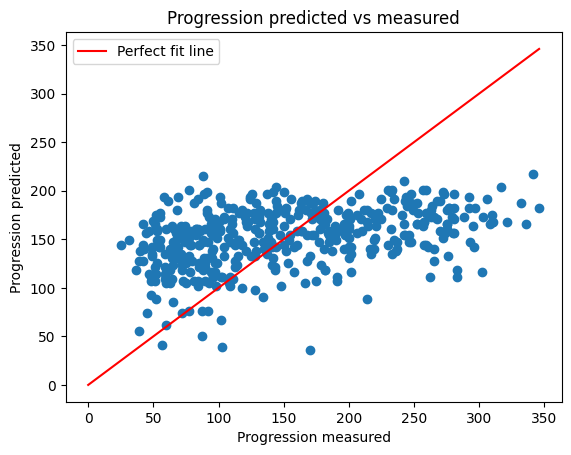

In [11]:
plot_predictions(y,y_pred_ols)

# Metrics for comparison:

# Coefficient of determination: $$R^2 = 1 - \frac{RSS}{TSS}$$

# Mean Average Error: $$MAE = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y_i})$$

# Mean Squared Error: $$MSE = \frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y_i})^2$$

# Root Mean Squared Error: $$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y_i})^2}$$

In [12]:
#Utility function to calculate metrics
def print_metrics(y,y_pred):
    rss = np.sum((y-y_pred)**2) # Sum of Squares of Residuals
    tss = np.sum((y-y.mean())**2) # Total Sum of Squares
    r2 = 1 - (rss/tss) #Coefficient of Determination
    mae = np.sum((y-y_pred))/len(y) #Mean Average Error
    mse = np.sum((y-y_pred)**2)/len(y) # Mean Squared Error
    rmse = math.sqrt(mse) # Root Mean Squared Error
    print('The Coefficient of Determination is %s' % r2)
    print('The Mean Average Error is %s' % mae)
    print('The  Mean Squared Error is %s' % mse)
    print('The Root Mean Squared Error is %s' % rmse)
    return r2,mae,mse,rmse

In [13]:
r2_ols,mae_ols,mse_ols,rmse_ols = print_metrics(y,y_pred_ols)

The Coefficient of Determination is 0.15585855244530533
The Mean Average Error is -1.5947022485837543e-14
The  Mean Squared Error is 5005.661620710652
The Root Mean Squared Error is 70.75070049625411


# Multiple Regression

$$Y = \beta_0X_0+ \beta_1X_1+ \beta_2X_2+ \beta_2X_3...$$
$$Y = X\beta$$

$$\beta = (X^{'}X)^{-1}X^{'}Y$$

In [14]:
X = diabetes_X.to_numpy()
y = diabetes_y.to_numpy()
X = np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
beta = np.linalg.inv(X.T@X)@X.T@y #Multiple Regression Coefficients

In [15]:
y_pred_ols = X@beta #Predicted progression based on alpha and beta
df_ols = print_predictions(y,y_pred_ols)
df_ols.head()

,Progression_measured,Progression_predicted,Error
0,151.0,206.116677,-55.116677
1,75.0,68.071033,6.928967
2,141.0,176.882790,-35.882790
3,206.0,166.914458,39.085542
4,135.0,128.462258,6.537742


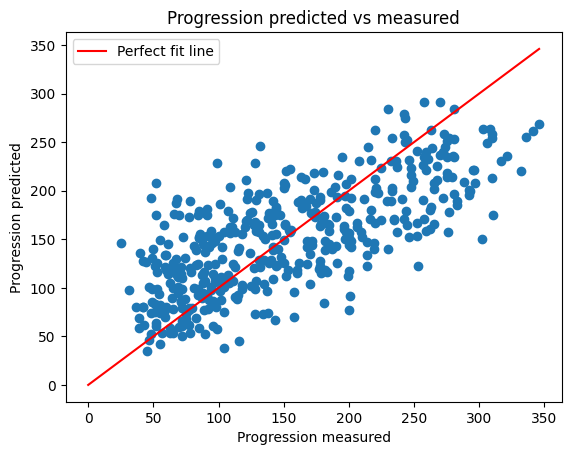

In [16]:
plot_predictions(y,y_pred_ols)

In [17]:
r2_ols,mae_ols,mse_ols,rmse_ols = print_metrics(y,y_pred_ols)

The Coefficient of Determination is 0.5177484222203498
The Mean Average Error is 5.24708481792074e-14
The  Mean Squared Error is 2859.6963475867506
The Root Mean Squared Error is 53.476128764026576


# Linear Regression with scikit-learn:

In [18]:
#Define Features and Labels
X = diabetes_X.to_numpy()
y = diabetes_y.to_numpy()
model =LinearRegression(fit_intercept=True)

In [19]:
#Fit the model
model.fit(X,y)

LinearRegression()

In [20]:
#Get coefficient of determination
model.score(X,y)

0.5177484222203499

In [21]:
#Model coefficients
model.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [22]:
#Model Intercept
model.intercept_

152.13348416289597

In [23]:
#Get predictions given features
model.predict(X)

array([206.11667725,  68.07103297, 176.88279035, 166.91445843,
       128.46225834, 106.35191443,  73.89134662, 118.85423042,
       158.80889721, 213.58462442,  97.07481511,  95.10108423,
       115.06915952, 164.67656842, 103.07814257, 177.17487964,
       211.7570922 , 182.84134823, 148.00326937, 124.01754066,
       120.33362197,  85.80068961, 113.1134589 , 252.45225837,
       165.48779206, 147.71997564,  97.12871541, 179.09358468,
       129.05345958, 184.7811403 , 158.71516713,  69.47575778,
       261.50385365, 112.82234716,  78.37318279,  87.66360785,
       207.92114668, 157.87641942, 240.84708073, 136.93257456,
       153.48044608,  74.15426666, 145.62742227,  77.82978811,
       221.07832768, 125.21957584, 142.6029986 , 109.49562511,
        73.14181818, 189.87117754, 157.9350104 , 169.55699526,
       134.1851441 , 157.72539008, 139.11104979,  72.73116856,
       207.82676612,  80.11171342, 104.08335958, 134.57871054,
       114.23552012, 180.67628279,  61.12935368,  98.72

# scikit-learn metrics

In [24]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [25]:
r2_score(y,y_pred_ols)

0.5177484222203498

In [26]:
mean_absolute_error(y,y_pred_ols)

43.27745202531506

In [27]:
mean_squared_error(y,y_pred_ols,squared=False)

53.476128764026576

# Dataset splitting

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 123)

In [48]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [49]:
model.score(X_test,y_test)

0.5078253552814807

In [50]:
model.score(X_train,y_train)

0.5174981091172834

In [33]:
from sklearn.model_selection import cross_val_score,cross_validate

In [51]:
model = LinearRegression()
scores = cross_val_score(model,X_train,y_train,cv=10)

In [52]:
scores

array([0.35468991, 0.54297326, 0.46332605, 0.47402725, 0.39454652,
       0.66136919, 0.63776782, 0.34669144, 0.30565147, 0.37444287])

In [53]:
scores.mean(),scores.std()

(0.45554857813014316, 0.11764432771634929)

In [54]:
scoring = ['r2','neg_mean_absolute_error']
scores = cross_validate(model,X_train,y_train,cv=10,scoring=scoring,return_train_score=True)

In [55]:
scores

{'fit_time': array([0.00953555, 0.00290203, 0.00209284, 0.00207472, 0.00210261,
        0.00200701, 0.00192881, 0.00191975, 0.00188851, 0.00233555]),
 'score_time': array([0.00132799, 0.0010736 , 0.00107718, 0.00171375, 0.00108051,
        0.00103426, 0.00106096, 0.00106621, 0.00105834, 0.00112939]),
 'test_r2': array([0.35468991, 0.54297326, 0.46332605, 0.47402725, 0.39454652,
        0.66136919, 0.63776782, 0.34669144, 0.30565147, 0.37444287]),
 'train_r2': array([0.53149221, 0.50717085, 0.52281891, 0.51898657, 0.52709628,
        0.49945342, 0.49352071, 0.52922205, 0.5356859 , 0.5260995 ]),
 'test_neg_mean_absolute_error': array([-46.08218051, -37.52361453, -49.96815769, -44.96003703,
        -47.05166615, -35.67055202, -46.38082717, -43.85269421,
        -48.98629127, -46.01451736]),
 'train_neg_mean_absolute_error': array([-42.68476855, -43.79369158, -42.40783359, -42.96435868,
        -42.69804572, -43.992924  , -42.93003702, -43.02976311,
        -42.31322561, -42.92404536])}